**Pontia Tech - Master Data Analytics - Visualización de Datos con Python**

***
Datos del alumno (Nombre y Apellidos):María Lucía Fernández Morant

Fecha:14/01/2025
***

<span style="font-size: 30pt; font-weight: bold; color: #0098cd;">Caso Práctico 2. Seguimiento Ventas PontiaSuperStore</span>

<span style="font-size: 15pt; font-weight: bold; color: #0098cd;">Sesión Live Teórica</span>

**Objetivos**

El objetivo de este caso práctico es realizar un reporte de generación automatica que permita el seguimiento diario a alto nivel de las ventas de la empresa Pontia SuperStore. Para ello usaremos la librería Plotly para la elaboración de gráficos Interactivos y realizaremos un reporte HTML de seguimiento.

**Enunciado**

Somos analistas recién llegados a una emergente empresa de ventas de productos generalistas: PontiaSuperStore.

A través de la base de datos de ventas de la empresa deberemos confeccionar un reporte de recurrencia diaria que nos permita tener una traza de las ventas de la empresa.




<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">1. Importación Librerías y Carga Datos</span>

<span style="font-size: 15pt; font-weight: bold; color: #0098cd;">1.1. Importación Librerías</span>


In [6]:
# Librerías Procesamiento de Datos.
import pandas as pd
import numpy as np

# Librería de Visualización
import plotly.express as px

# Librerías de manejo de fechas
import datetime
from dateutil.relativedelta import relativedelta

In [7]:
%matplotlib inline

<span style="font-size: 15pt; font-weight: bold; color: #0098cd;">1.2. Carga de Datos</span>

La carga de los datos la podemos hacer en Colab usando la librería "io" o en local.

Google Colab

In [8]:
## En Google Colab
from google.colab import files
uploaded = files.upload()

Saving PontiaSuperStore (2).xls to PontiaSuperStore (2) (1).xls


In [13]:
import io
from google.colab import files
uploaded = files.upload()
# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[filename]))

Saving PontiaSuperStore (2).xls to PontiaSuperStore (2) (2).xls


En local

In [ ]:
# df = pd.read_excel("PontiaSuperStore.xls", sheet_name="Orders")
# df = pd.read_csv("Sample - Superstore.csv", encoding = 'Windows-1254')

#Revisamos el dato:

In [14]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#Y los tipos de datos:

In [15]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">2. Reporte Seguimiento Ventas Diario</span>

<span style="font-size: 15pt; font-weight: bold; color: #0098cd;">2.1 Selección de fechas.</span>

Lo primero será escoger la fecha para la cual queremos realizar el reporte.

La idea aquí es con la automatización del reporte hagamos uso de funciones de python para que seleccione el dia en curso.

**Importante**: Por el momento nos vale con la seleccion que planteo más abajo. (hagamos el esfuerzo de pensar que estamos a 19 de diciembre, pero del 2017!)

In [16]:
today_dt = datetime.datetime.today()
today = datetime.datetime.strftime(today_dt, "%Y-%m-%d")

today = '2017-12-19' # En nuestro Dataset solo tenemos hasta diciembre 2017

last_year_dt = datetime.datetime.strptime(today, "%Y-%m-%d") - relativedelta(years=1)
last_year = datetime.datetime.strftime(last_year_dt, "%Y-%m-%d")
last_month_dt = datetime.datetime.strptime(today, "%Y-%m-%d") - relativedelta(months=1)
last_month = datetime.datetime.strftime(last_month_dt, "%Y-%m-%d")
print('Hoy: ', today)
print('Mes Anterior: ', last_month)
print('Año Anterior: ', last_year)

Hoy:  2017-12-19
Mes Anterior:  2017-11-19
Año Anterior:  2016-12-19



<span style="font-size: 15pt; font-weight: bold; color: #0098cd;">2. 2. Genera las siguientes variables calculadas.</span>


- Year. Que contenga el Año de Order Date.
- Month. Que contenga el Mes de Order Date.
- Day. Que contenga el Dia de Order Date.
- YearMonth. Que contenga YYYY-MM (año-mes)



# Respuesta:
Tiene formato de código




Utiliza pandas y numpy para generar variables.

In [17]:
df['Year'] = df['Order Date'].dt.year.astype(str)
df['Month'] = df['Order Date'].dt.month.astype(str)
df['Day'] = df['Order Date'].dt.day
df['YearMonth'] = df['Year'] +'-'+ df['Month']  #df['Order Date'].dt.to_period('M').astype('category')
df['YearMonth'] = df['Year'] +'-'+ df['Month']  #df['Order Date'].dt.to_period('M').astype('category')

In [18]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day,YearMonth
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11,8,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,11,8,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2016,6,12,2016-6


<span style="font-size: 15pt; font-weight: bold; color: #0098cd;">2.3 Evolución diaria de las ventas vs beneficio.</span>


Preparacion de los datos:

- Para una correcta visualización recomiendo filtrar al menos por el año 2016 y 2017.

- Para la agregación queremos la suma tanto de Sales como de Profit.

In [27]:
# Preparacion del dato filtrando año 2016 y 2017
df_line = df[['Order Date', 'Sales', 'Profit']].loc[df['Year']>=today[0:4]].groupby(by=['Order Date'], as_index=False).sum()
df_line

,Order Date,Sales,Profit
0,2017-01-01,1481.8280,-181.4109
1,2017-01-02,2079.5540,-207.0473
2,2017-01-03,2070.2720,704.2800
3,2017-01-06,33.7400,15.5204
4,2017-01-07,3395.5900,758.7192
...,...,...,...
317,2017-12-26,814.5940,61.1202
318,2017-12-27,177.6360,-31.9742
319,2017-12-28,1657.3508,253.1188
320,2017-12-29,2915.5340,644.4338


In [28]:
px.line(df_line, x='Order Date', y=['Sales'])

Respuesta:
Comprobamos que hay un aumento de ventas el dia 23 de Marzo, 22 de Octubre y 17 de Noviembre.
Comprobamos que el resto de meses estivales las ventas son mas similares y que al llegar Septiembre hay una subida en las ventas.

Piensa que tipo de gráfico es el más adecuado para visualizar evoluciones temporales. Recomiendo usar evolutivos de areas, explorar en plotly express: px.area

In [21]:
# Plotly Express para Gráficar un Area
fig_line = px.area(df_line, x='Order Date', y=['Sales', 'Profit'], color_discrete_sequence=['darkred', 'darkgreen'],
            line_shape='spline', labels={'Year':'Año', 'Sales':'Nº Ventas', 'value':'Importe (€)'},
            template = 'simple_white', title='Sales & Profit Day Evolution')

# Modificando el Layout General
fig_line.update_layout(
    font = { # Cambios en la fuente general del
        'family':"Times New Roman",
        'size':16,
        'color':'grey'
        },
    title={ # Podemos customizar los elementos dentro del titulo.
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_family':"Times New Roman",
        'font_size':25,
        'font_color':'black'},
    showlegend=True)

# Modificadores de Ejes.
fig_line.update_yaxes(
        title_font = {'size':20, 'color':'grey'}, # Customización Elementos del Título.
        ticks="outside", tickwidth=2, tickcolor='black', ticklen=5, # Customización de los Ticks.
        showline=True, linewidth=2, linecolor='black', # Customizacion Axis Line (lineas de ejes)
        showgrid=False, gridwidth=1, gridcolor='grey', griddash='dash', minor_griddash=None, # Customización del GRID
        zeroline=False, zerolinewidth=2, zerolinecolor='black', # Customizando 0.
        range=[None, None]
        )
fig_line.update_xaxes(
        title_font = {'size':20, 'color':'grey'}, # Customización Elementos del Título.
        ticks="outside", tickwidth=2, tickcolor='black', ticklen=10, # Customización de los Ticks.
        showline=True, linewidth=2, linecolor='black', # Customizacion Axis Line (lineas de ejes)
        showgrid=False, gridwidth=1, gridcolor='grey', griddash='dash', minor_griddash="dot",  # Customización del GRID
        zeroline=False, zerolinewidth=2, zerolinecolor='black', # Customizando 0.
        range=[None, None]
        )

fig_line.show()
# Add fig_line.show(renderer='notebook') to convert into HTML

¿Es posible identificar Dias en los que el beneficio salga a pérdidas? Identifica algunos si es posible, para ello juega con la interactividad del gráfico para hacer zoom.

Respuesta:
Vemos que los beneficios van acompañados con las ventas excepto el 16 de junio que se observa un mayor beneficio junto con fechas puntuales como;23 de Marzo,8 de Abril2 Septiembre,22 de Octubre,17 de noviembre.
El grafico muestra indudablemente que en general hay benefcios.


<span style="font-size: 15pt; font-weight: bold; color: #0098cd;">2.4 Evolución diaria de las ventas: Mes en curso vs mes anterior vs año anterior</span>


Algunas métricas clasicas de seguimientos están relacionadas con enfrentar el desempeño actual contra periodos anteriores.

Preparacion del dato:

- Necesitamos filtrar el dataset para los meses en curso, mes anterior y mismo mes año anterior de la fecha elegida.
- La agregacion será la suma de ventas (Sales)

In [29]:
filtro_meses = [today[0:7], last_month[0:7], last_year[0:7]]
df_line2 = df[['YearMonth', 'Day', 'Sales', 'Profit']].loc[df['YearMonth'].isin(filtro_meses)].groupby(by=['YearMonth', 'Day'], as_index=False).sum()
df_line2['Sales Acum'] = df_line2.groupby('YearMonth').Sales.transform('cumsum')
df_line2.head(10)

,YearMonth,Day,Sales,Profit,Sales Acum
0,2016-12,1,7365.455,1652.8648,7365.455
1,2016-12,2,4684.616,992.4432,12050.071
2,2016-12,3,5269.816,1065.8562,17319.887
3,2016-12,4,944.286,146.7888,18264.173
4,2016-12,5,5267.004,1468.7369,23531.177
5,2016-12,6,3878.276,1017.2351,27409.453
6,2016-12,8,4709.095,146.9703,32118.548
7,2016-12,9,1855.483,340.0393,33974.031
8,2016-12,10,3459.710,1020.2983,37433.741
9,2016-12,11,6102.250,425.9722,43535.991


Respuesta:
En general vemos que no hay perdidas, si es cierto que hay dias en los que los beneficios no son considerables.

Elaborar grafico de lineas, debe haber una linea para cada Año-Mes. Observa bien los ejes del ejemplo.

In [23]:
# Plotly Express para Gráficar una linea.
fig_line2 = px.line(df_line2, x='Day', y='Sales Acum', color='YearMonth',
             color_discrete_sequence=['darkred', 'darkblue', 'darkgreen'],
            labels={'Day':'Dia', 'Sales Acum':'Ventas Acumuladas', 'YearMonth':'Año-Mes'},
            template = 'simple_white', title='Evolución Diaria de Ventas Por Meses')

# Modificando el Layout General
fig_line2.update_layout(
    font = { # Cambios en la fuente general del
        'family':"Times New Roman",
        'size':16,
        'color':'grey'
        },
    title={ # Podemos customizar los elementos dentro del titulo.
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_family':"Times New Roman",
        'font_size':25,
        'font_color':'black'},
    showlegend=True)

# Modificadores de Ejes.
fig_line2.update_yaxes(
        title_font = {'size':20, 'color':'grey'}, # Customización Elementos del Título.
        ticks="outside", tickwidth=2, tickcolor='black', ticklen=5, # Customización de los Ticks.
        showline=True, linewidth=2, linecolor='black', # Customizacion Axis Line (lineas de ejes)
        showgrid=False, gridwidth=1, gridcolor='grey', griddash='dash', minor_griddash=None, # Customización del GRID
        zeroline=False, zerolinewidth=2, zerolinecolor='black', # Customizando 0.
        range=[None, None]
        )
fig_line2.update_xaxes(
        title_font = {'size':20, 'color':'grey'}, # Customización Elementos del Título.
        ticks="outside", tickwidth=2, tickcolor='black', ticklen=10, # Customización de los Ticks.
        showline=True, linewidth=2, linecolor='black', # Customizacion Axis Line (lineas de ejes)
        showgrid=False, gridwidth=1, gridcolor='grey', griddash='dash', minor_griddash="dot",  # Customización del GRID
        zeroline=False, zerolinewidth=2, zerolinecolor='black', # Customizando 0.
        range=[None, None]
        )
fig_line2.show()
# Add fig_line2.show(renderer='notebook') to convert into HTML

¿Crees que los dueños estarán contentos con el desempeño de diciembre?
Realmente no, se ve claramente que el mes de Noviembre fue muchísimo mejor.


- ¿Cual es la categoria predominante? productos de tecnología
- ¿Cual ha evolucionado más con respecto al año pasado?

<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">3. Guardado del Trabajo.</span>

In [37]:
#categorias
df_line3 = df[['Category', 'Sales', 'Profit']].groupby(by=['Category'], as_index=False).sum()
df_line3


,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


In [56]:
#evolucion de categorias respecto al año pasado en grafico

df_line4 = df[['Year', 'Category', 'Sales', 'Profit']].groupby(by=['Year', 'Category'], as_index=False).sum()
df_line4['Sales Acum'] = df_line4.groupby('Category').Sales.transform('cumsum')

df_line4


,Year,Category,Sales,Profit,Sales Acum
0,2014,Furniture,157192.8531,5457.7255,157192.8531
1,2014,Office Supplies,151776.4120,22593.4161,151776.4120
2,2014,Technology,175278.2330,21492.8325,175278.2330
3,2015,Furniture,170518.2370,3015.2029,327711.0901
4,2015,Office Supplies,137233.4630,25099.5338,289009.8750
5,2015,Technology,162780.8090,33503.8670,338059.0420
6,2016,Furniture,198901.4360,6959.9531,526612.5261
7,2016,Office Supplies,183939.9820,35061.2292,472949.8570
8,2016,Technology,226364.1800,39773.9920,564423.2220
9,2017,Furniture,215387.2692,3018.3913,741999.7953


In [71]:
def graficar_ventas_por_categoria(data):
    # Asegúrate de que 'Año' y 'Categoría' sean columnas en tu DataFrame
    # Agrupar los datos por año y categoría, sumando las ventas
    ventas_agrupadas = data.groupby(['Año', 'Categoría'])['Ventas'].sum().unstack()

  # Crear el gráfico de líneas
    plt.figure(figsize=(10, 6))
    for categoria in ventas_agrupadas.columns:
        plt.plot(ventas_agrupadas.index, ventas_agrupadas[categoria], marker='o', label=categoria)
 # Añadir título y etiquetas
    plt.title('Ventas por Categoría y Año')
    plt.xlabel('Año')
    plt.ylabel('Ventas')
    plt.legend(title='Categoría')
    plt.grid()
    plt.xticks(ventas_agrupadas.index)  # Asegúrate de que los años se muestren correctamente
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()
# Ejemplo de uso
def graficar_ventas_por_categoria(data):
    # Asegúrate de que 'Año' y 'Categoría' sean columnas en tu DataFrame
    # Agrupar los datos por año y categoría, sumando las ventas
    ventas_agrupadas = data.groupby(['Año', 'Categoría'])['Ventas'].sum().unstack()

  # Crear el gráfico de líneas
    plt.figure(figsize=(10, 6))
    for categoria in ventas_agrupadas.columns:
        plt.plot(ventas_agrupadas.index, ventas_agrupadas[categoria], marker='o', label=categoria)
 # Añadir título y etiquetas
    plt.title('Ventas por Categoría y Año')
    plt.xlabel('Año')
    plt.ylabel('Ventas')
    plt.legend(title='Categoría')
    plt.grid()
    plt.xticks(ventas_agrupadas.index)  # Asegúrate de que los años se muestren correctamente
    plt.tight_layout()


# Ejemplo de uso
# Crear un DataFrame de ejemplo
data = pd.DataFrame({
    'Año': ["sales"],
    'Categoría': ['category'],
    'Ventas': [0]
})

   # Mostrar el gráfico
    plt.show()

IndentationError: unexpected indent (<ipython-input-71-e3a1d20cfb64>, line 50)

In [70]:
# Plotly Express para Gráficar una linea para las categorias de productos

fig_line3 = px.line(df_line3, x='Category', y='Sales',
             color_discrete_sequence=['darkred', 'darkblue', 'darkgreen'],
            labels={'Day':'Dia', 'Sales':'Sales Acum'},
            title='Sales per Category') # title argument moved inside px.line

# Modificando el Layout General
fig_line3.update_layout( # Changed fig_line2 to fig_line3
    font = { # Cambios en la fuente general del
        'family':"Times New Roman",
        'size':16,
        'color':'grey'
        },
    title={ # Podemos customizar los elementos dentro del titulo.
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_family':"Times New Roman",
        'font_size':25,
        'font_color':'black'},
    showlegend=True)

# Modificadores de Ejes.
fig_line3.update_yaxes( # Changed fig_line2 to fig_line3
        title_font = {'size':20, 'color':'grey'}, # Customización Elementos del Título.
        ticks="outside", tickwidth=2, tickcolor='black', ticklen=5, # Customización de los Ticks.
        showline=True, linewidth=2, linecolor='black', # Customizacion Axis Line (lineas de ejes)
        showgrid=False, gridwidth=1, gridcolor='grey', griddash='dash', minor_griddash=None, # Customización del GRID
        zeroline=False, zerolinewidth=2, zerolinecolor='black', # Customizando 0.
        range=[None, None]
        )
fig_line3.update_xaxes( # Changed fig_line2 to fig_line3
        title_font = {'size':20, 'color':'grey'}, # Customización Elementos del Título.
        ticks="outside", tickwidth=2, tickcolor='black', ticklen=10, # Customización de los Ticks.
        showline=True, linewidth=2, linecolor='black', # Customizacion Axis Line (lineas de ejes)
        showgrid=False, gridwidth=1, gridcolor='grey', griddash='dash', minor_griddash="dot",  # Customización del GRID
        zeroline=False, zerolinewidth=2, zerolinecolor='black', # Customizando 0.
        range=[None, None]
        )
fig_line3.show()


# Add fig_line3.show(renderer='notebook') to convert into HTML # Changed fig_line2 to fig_line3



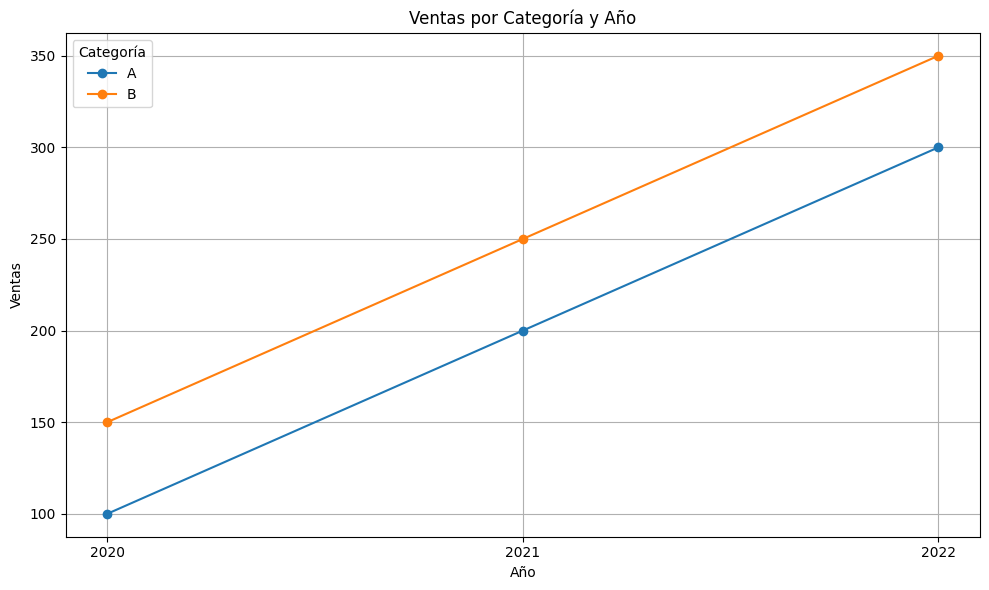

In [58]:

import pandas as pd
import matplotlib.pyplot as plt

def graficar_ventas_por_categoria(data):
    # Asegúrate de que 'Año' y 'Categoría' sean columnas en tu DataFrame
    # Agrupar los datos por año y categoría, sumando las ventas
    ventas_agrupadas = data.groupby(['Año', 'Categoría'])['Ventas'].sum().unstack()

def graficar_ventas_por_categoria(data):
    # Asegúrate de que 'Año' y 'Categoría' sean columnas en tu DataFrame
    # Agrupar los datos por año y categoría, sumando las ventas
    ventas_agrupadas = data.groupby(['Año', 'Categoría'])['Ventas'].sum().unstack()

# Ejemplo de uso
# Crear un DataFrame de ejemplo
data = pd.DataFrame({
    'Año': [2020, 2020, 2021, 2021, 2022, 2022],
    'Categoría': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Ventas': [100, 150, 200, 250, 300, 350]
})

graficar_ventas_por_categoria(data)

In [50]:
fig_line2.write_html('Evolucion_Ventas_Meses.html')

In [25]:
!jupyter nbconvert  --to html --no-input Pontia_ModuloViz_Caso2_Seguimiento_Ventas_PontiaSuperStore.ipynb

[NbConvertApp] WARNING | pattern 'Pontia_ModuloViz_Caso2_Seguimiento_Ventas_PontiaSuperStore.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent t